# **Assessment of a fetal's health**

First of all, we have to import all the necessary modules.

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, linear_model, metrics
from sklearn.preprocessing import StandardScaler

# I am working on a Google Colab environment, so i have to mount the notebook to the dataset folder in my Google Drive.
# If you are working locally, you will have to add the path to the folder containing the dataset inside your read_csv() function.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1. Exploratory Data Analysis (EDA)**


The first step is to load the data of the csv file (a.k.a. the dataset containing the fetals' characteristics) using the ***read_csv( )*** function.

In [28]:
folder = '/content/drive/MyDrive'
dataset = pd.read_csv(folder + '/fetal_health.csv')   # read csv file

After that, we can get an idea of how the dataset is like. We can see the shape of the dataset as well as the columns of it, using the two following functions.

In [29]:
print(dataset.shape)    # shape of the dataset

(2126, 22)


In [30]:
print(dataset.columns)    # columns of the dataset

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


The dataset consists of 2126 samples and 21 features, with the last (22nd) column named '**fetal_health**' being the label or the target variable y. It's time to split the data into features **x** and label **y**. The variable "***data***" contains all the columns of the dataset except the last one and the variable "***y***" contains only the values of the last column.

In [31]:
data = dataset.drop('fetal_health', axis=1).values     # features x
y = dataset['fetal_health'].values                     # label y
print(data.shape)
print(y.shape)

(2126, 21)
(2126,)


The next step is the creation of the histogram for each feature using the ***pyplot.hist( )*** function. Based on the histograms, we can draw important conclusions about the attributes' values.

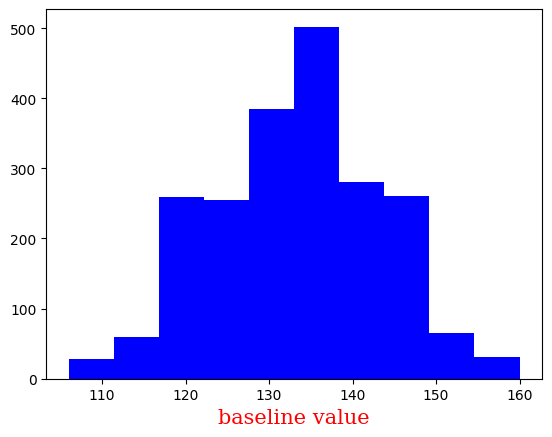

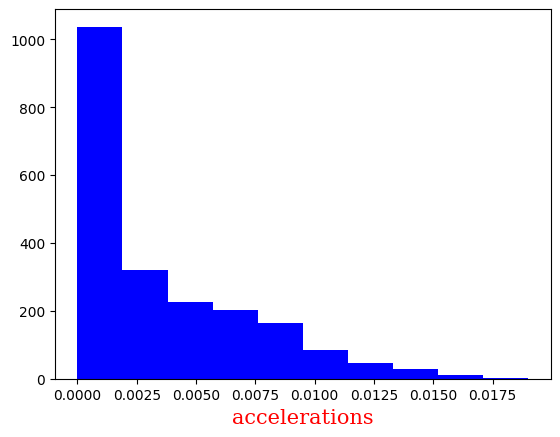

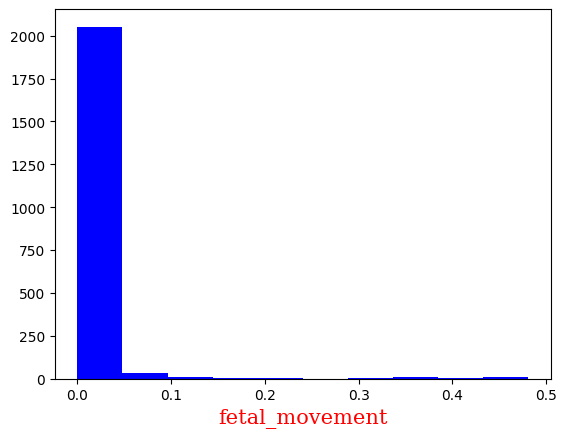

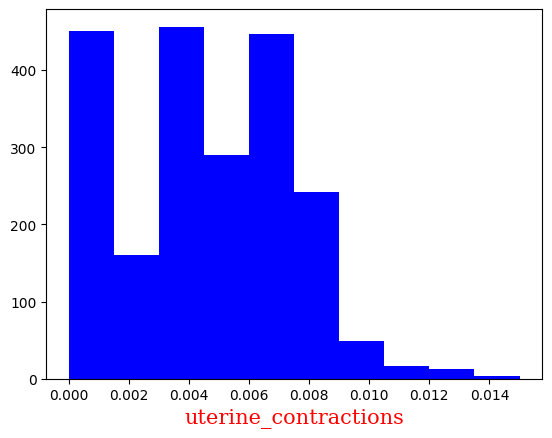

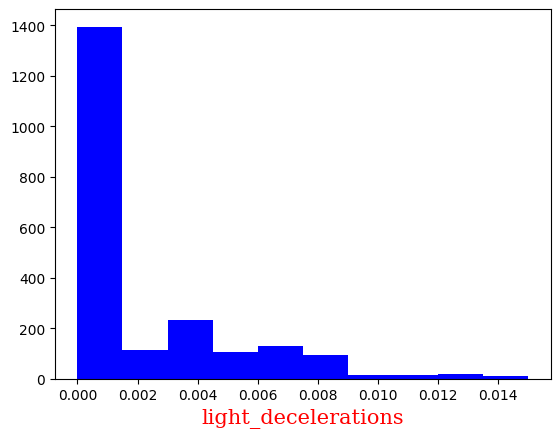

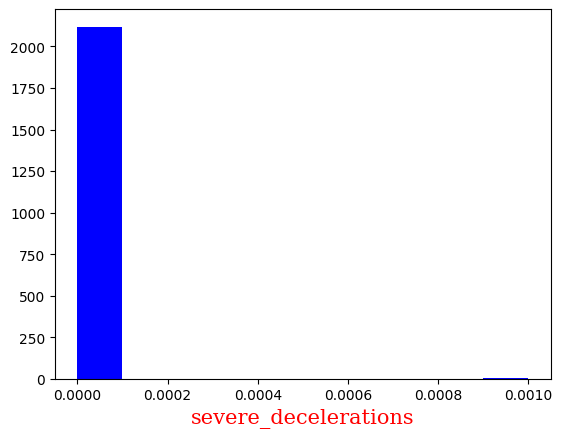

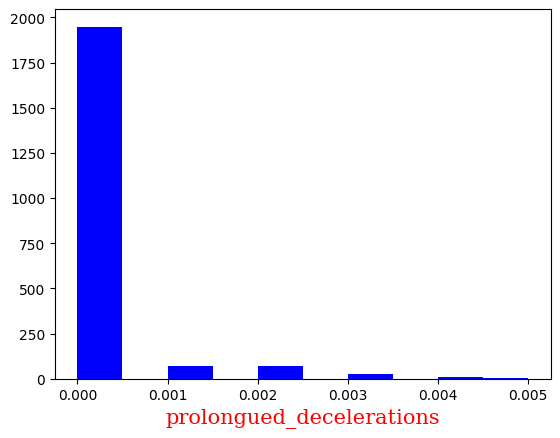

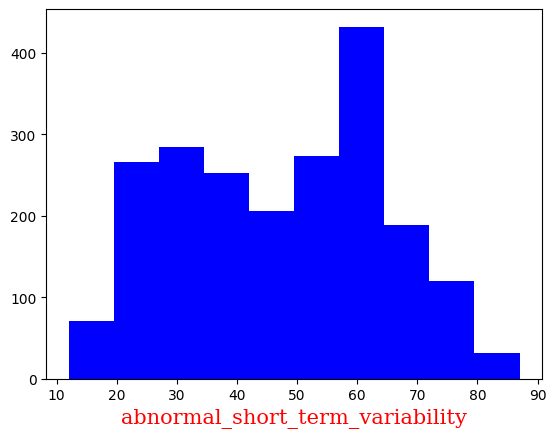

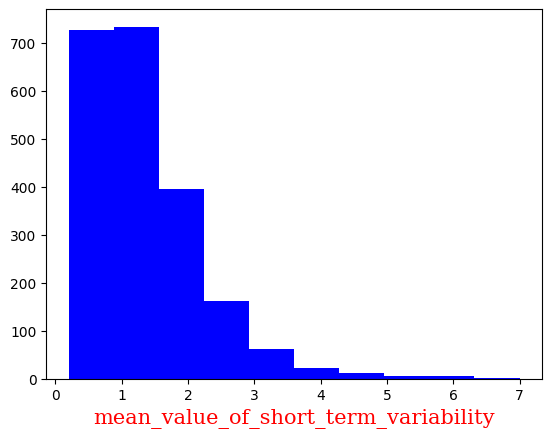

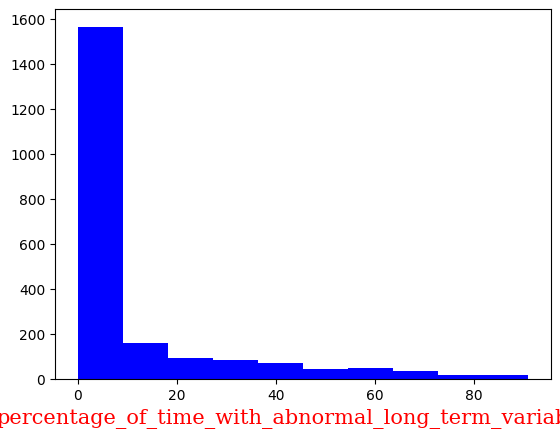

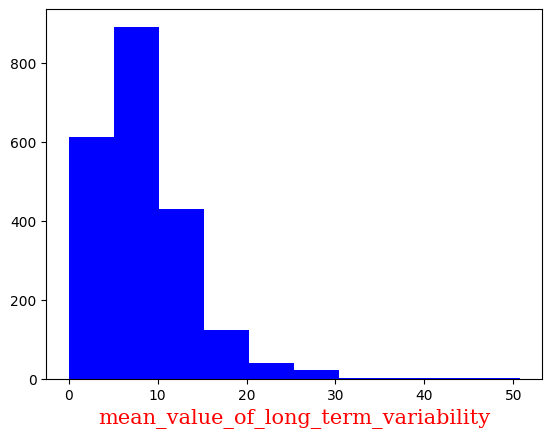

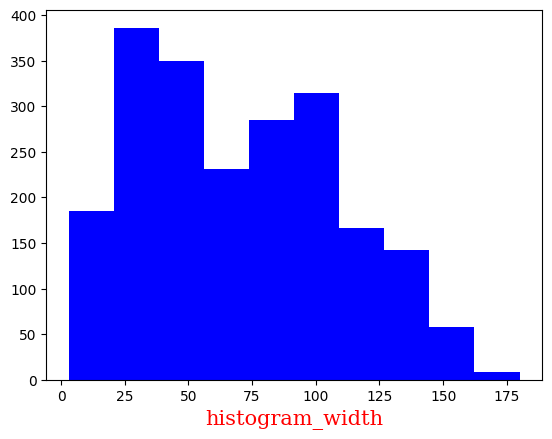

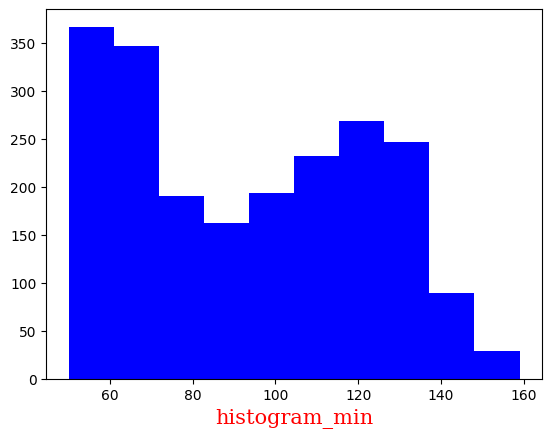

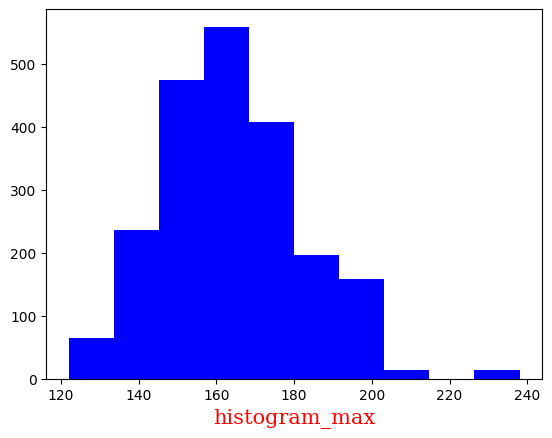

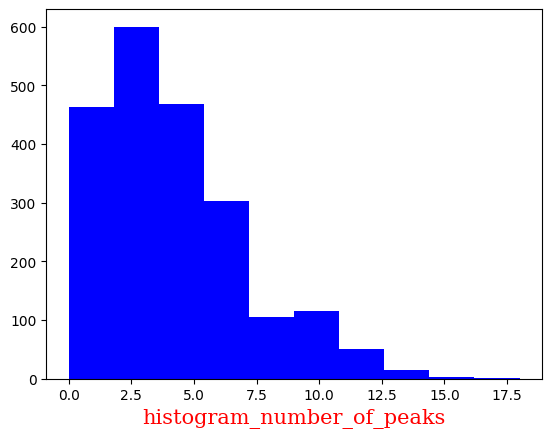

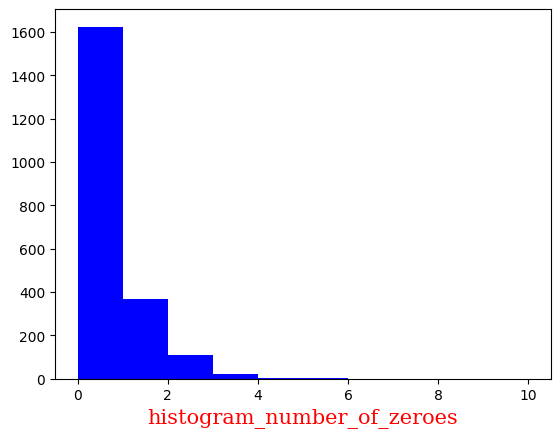

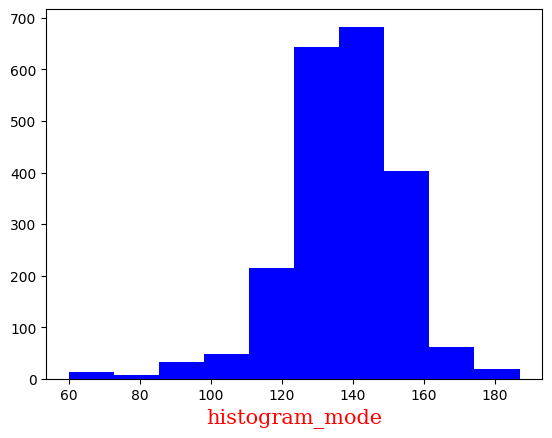

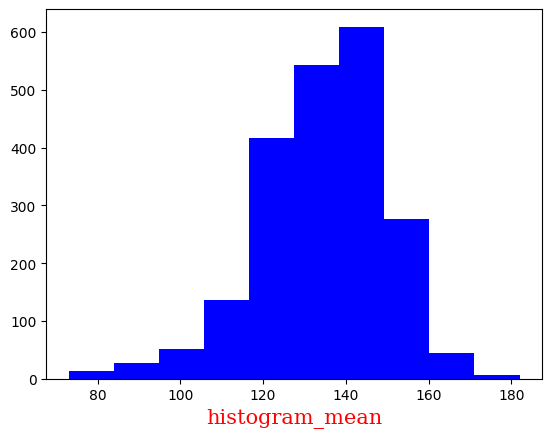

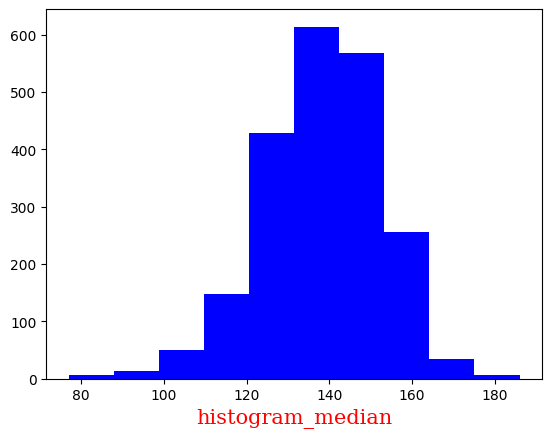

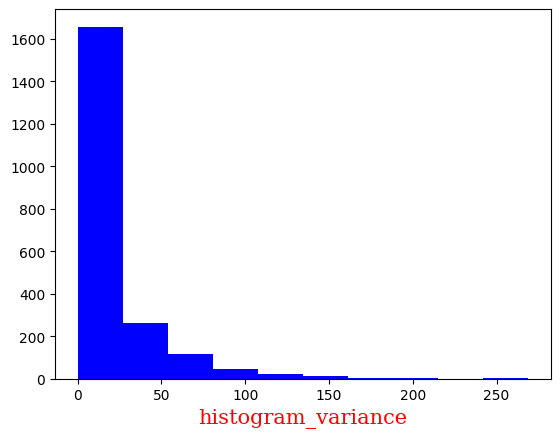

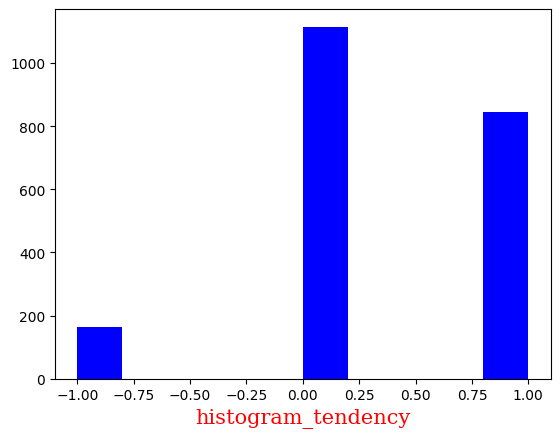

In [32]:
font1 = {'family':'serif','color':'red','size':15}
for i in range(data.shape[1]):
    plt.hist(data[:, i], color = 'blue')                    # histogram for each characteristic
    plt.xlabel(dataset.columns[i], fontdict = font1)
    print('\n')
    plt.show()

Then, using some functions from the **pandas** library we can see some samples of the dataset as well as some statistics about it, such as mean value of each feature, standard deviation, min and max values, etc.

In [33]:
dataset.head(20)      # returns the first 20 samples of the dataset

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.000,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.000,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.000,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.000,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [34]:
dataset.info()      # returns information about the dataset (number of columns, data type, names of columns, memory usage in bytes, etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [35]:
dataset.describe()      # returns a description of the dataset (mean value, standard deviation, min/max value, number of non-empty values & percentiles)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


We can see that the range of values of the "baseline value" attribute is 120 - 160, as are the attributes "histogram_mean", "histogram_median", etc. However, other features such as "fetal_movement" take values that are close to 0. Features such as "histogram_variance" on the other hand show greater variations in the values they receive, as this feature takes values close to 0 (e.g. 1.0, 3.0) or very large values (e.g. 215.0). Also, the datatype of all features is **float64**.

After that, we can calculate how many samples of the dataset belong to the "Normal" category, how many to the "Suspected for pathology" category and how many to the "Pathological" category.

In [36]:
normal = 0      # Initialize parameters
possible = 0
pathological = 0

for i in y:         # Cross y
  if i == 1:
    normal = normal + 1
  elif i == 2:
     possible = possible + 1
  else:
    pathological = pathological + 1

print('The "normal" medical test results are:', normal)                                 # Normal examination results
print('The "possible for pathology" medical test results are:', possible)               # Suspected for pathology examination results
print('The "pathological" medical test results are:', pathological)                     # Pathological examination results

The "normal" medical test results are: 1655
The "possible for pathology" medical test results are: 295
The "pathological" medical test results are: 176


We observe that 1655 samples of the dataset belong to the "normal" category, 295 to the "suspected pathology" category and the remaining 176 to the "pathological" category. Therefore, we conclude that **the dataset is unbalanced**. Balanced means that all classes contain the same number of samples. In this particular case, the dataset would have been balanced if the total 2126 samples were split into 3 equal parts (708 samples each) and each class contained 708 samples. However, the "normal" class contains more than 50% of the samples, i.e. more than half of them, while the others contain few samples compared to it. So, the dataset is not balanced.

In addition to the above histograms, we can also generate a boxplot for each feature. The boxplot shows the distribution of the quantitive data.

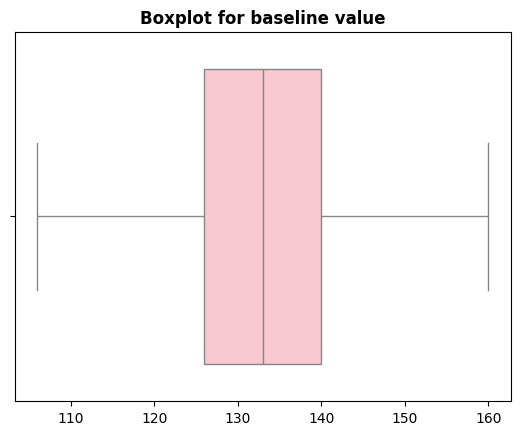

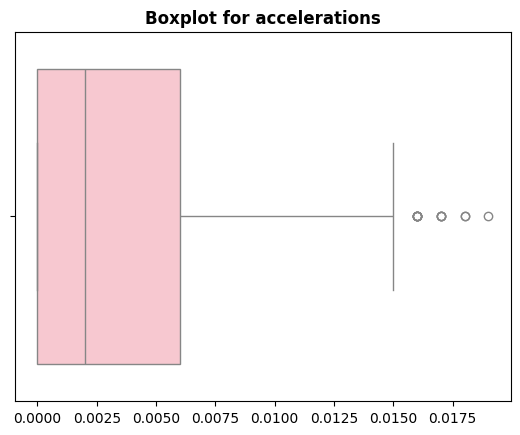

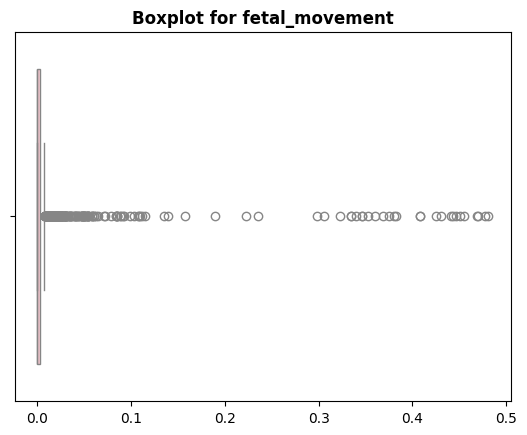

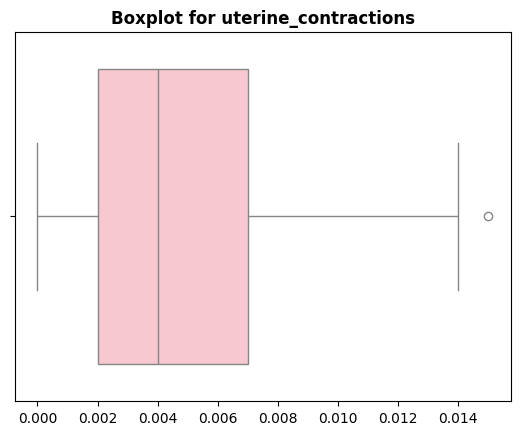

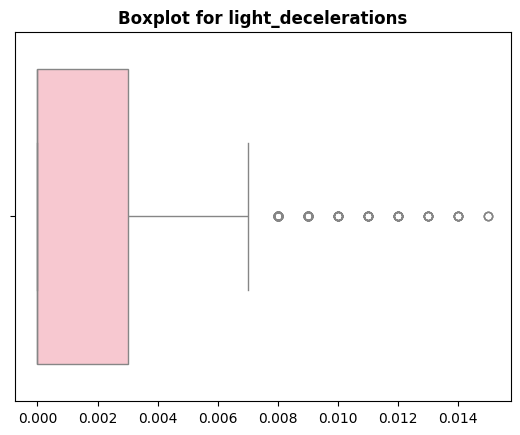

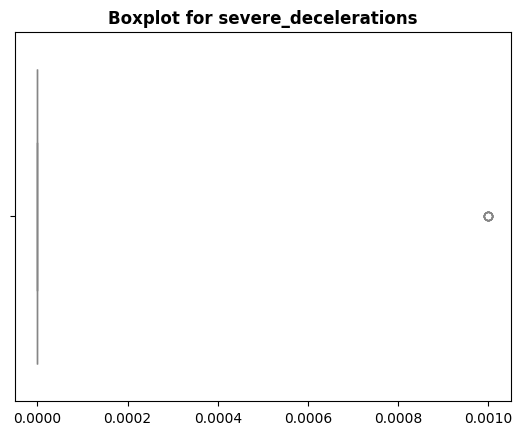

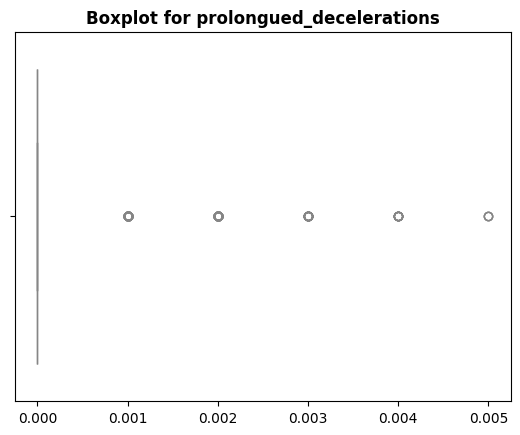

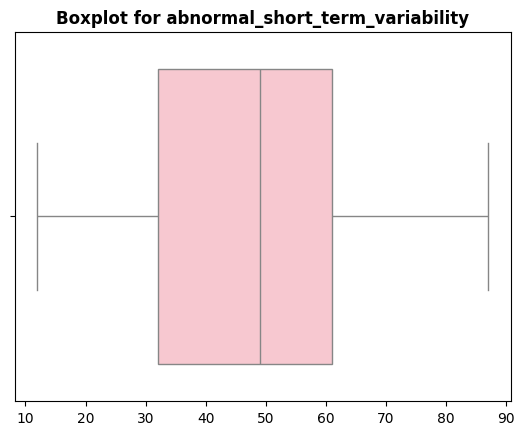

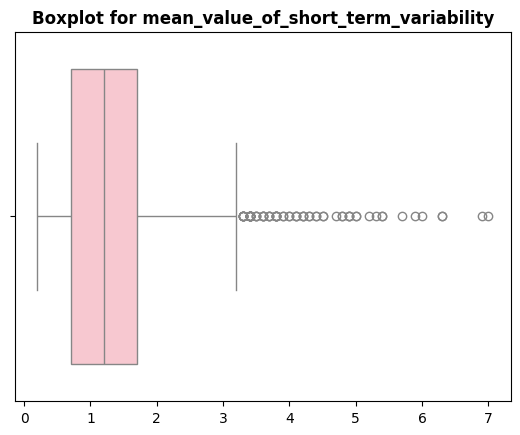

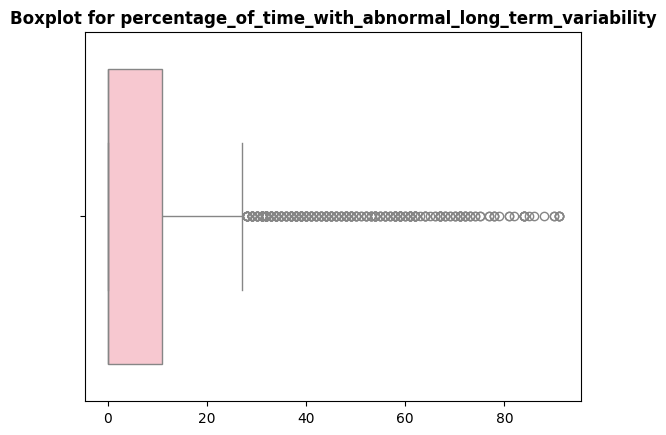

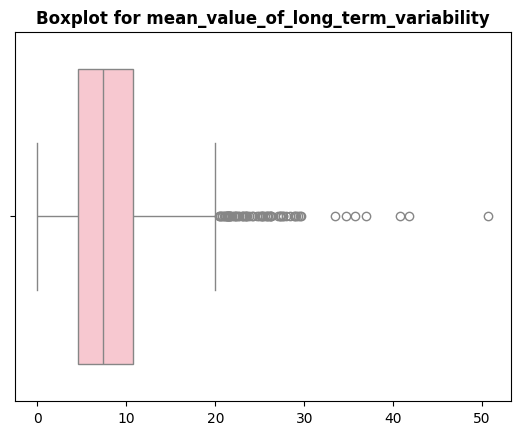

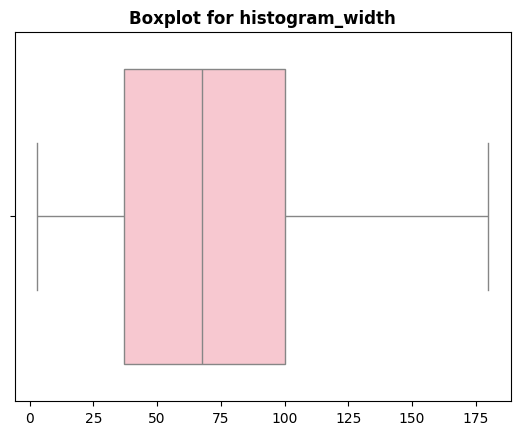

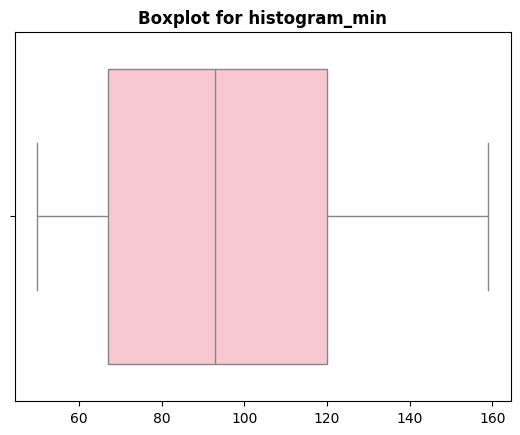

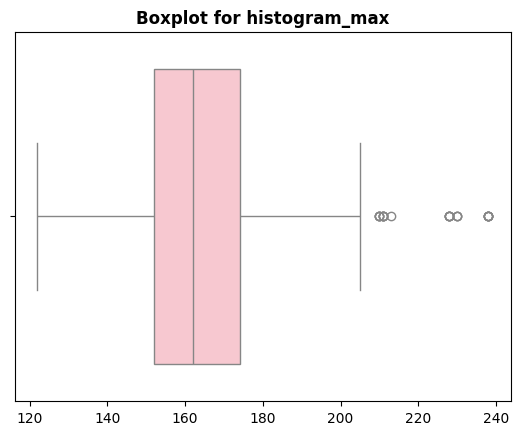

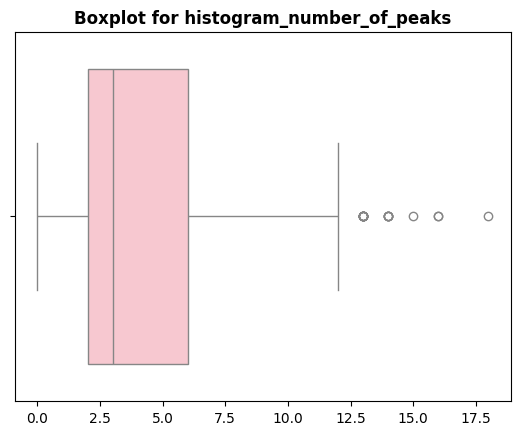

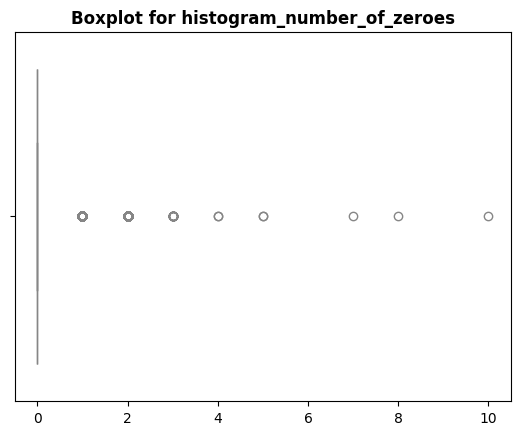

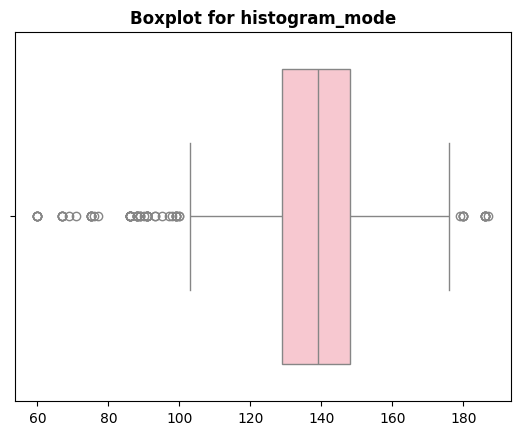

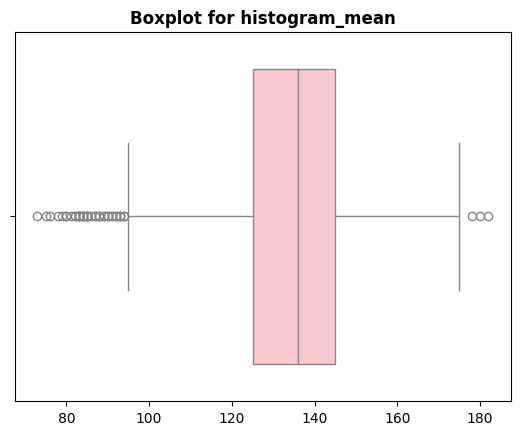

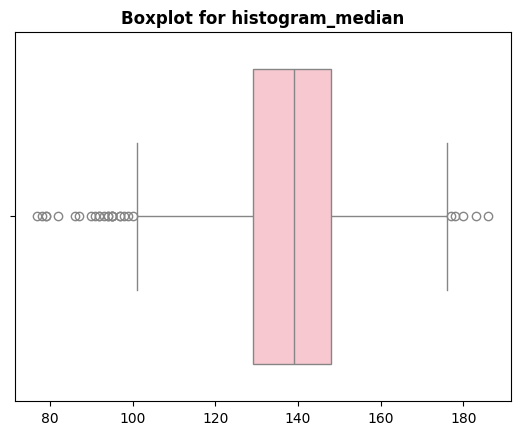

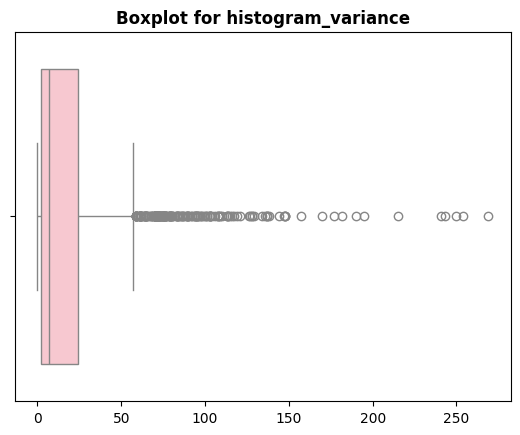

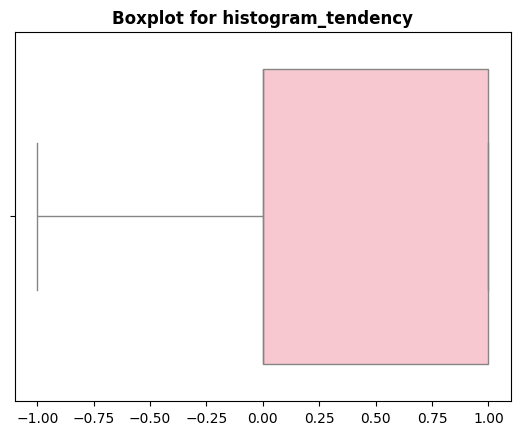

In [37]:
for i in range(data.shape[1]):
  bp = sns.boxplot(x=data[:, i], color='pink')                                    # create boxplot
  bp.set_title('Boxplot for ' + dataset.columns[i], fontweight='bold')            # add title
  print('\n')
  plt.show()

Moreover, we can calculate the heterocorrelation between all features using the ***corr( )*** function and then we can visualize the result with ***heatmap( )***.

In [38]:
dataset.corr()    # heterocorrelation between features

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


<Axes: >

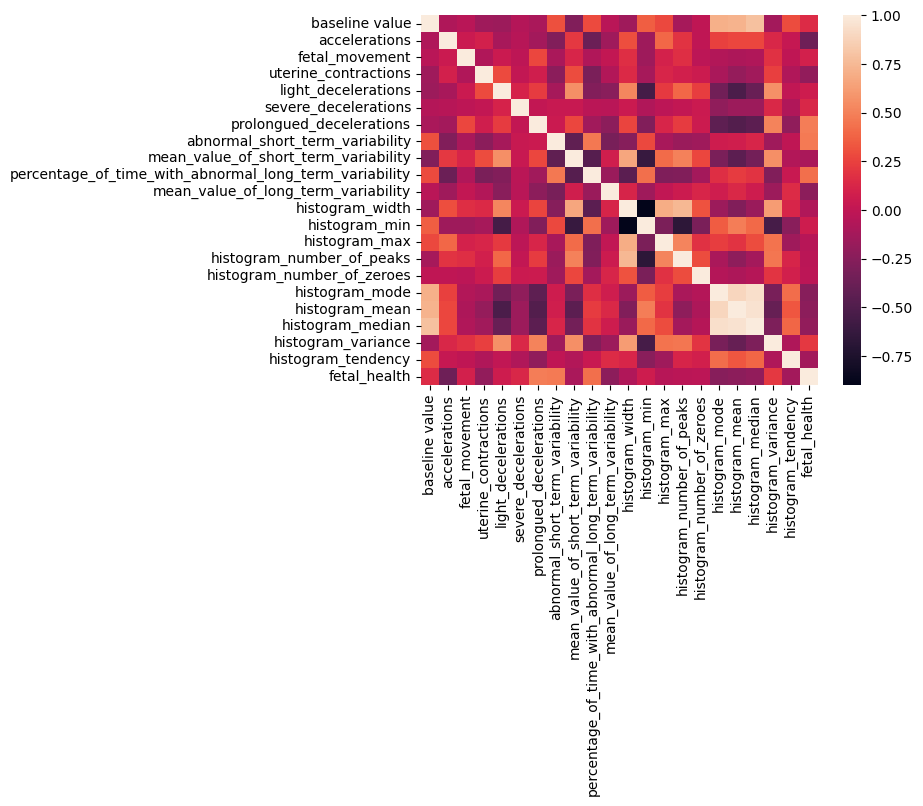

In [39]:
sns.heatmap(dataset.corr())   # visualization of heterocorrelations

The **heterocorrelation** between a feature and itself equals 1, which is also shown in the **heatmap( )** plot. The main diagonal has corr = 1. In the correlation matrix returned by **corr( )**, the value 1 indicates correlation, while the value 0 indicates no correlation. The closer it gets to 0, the "lower" the correlation between them.

This specific dataset is complete, i.e. it doesn't contain any missing values, which can be seen using the following methods.

In [40]:
dataset.isnull()       # detects if there are missing values (alternatively use "dataset.isna().sum()")

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

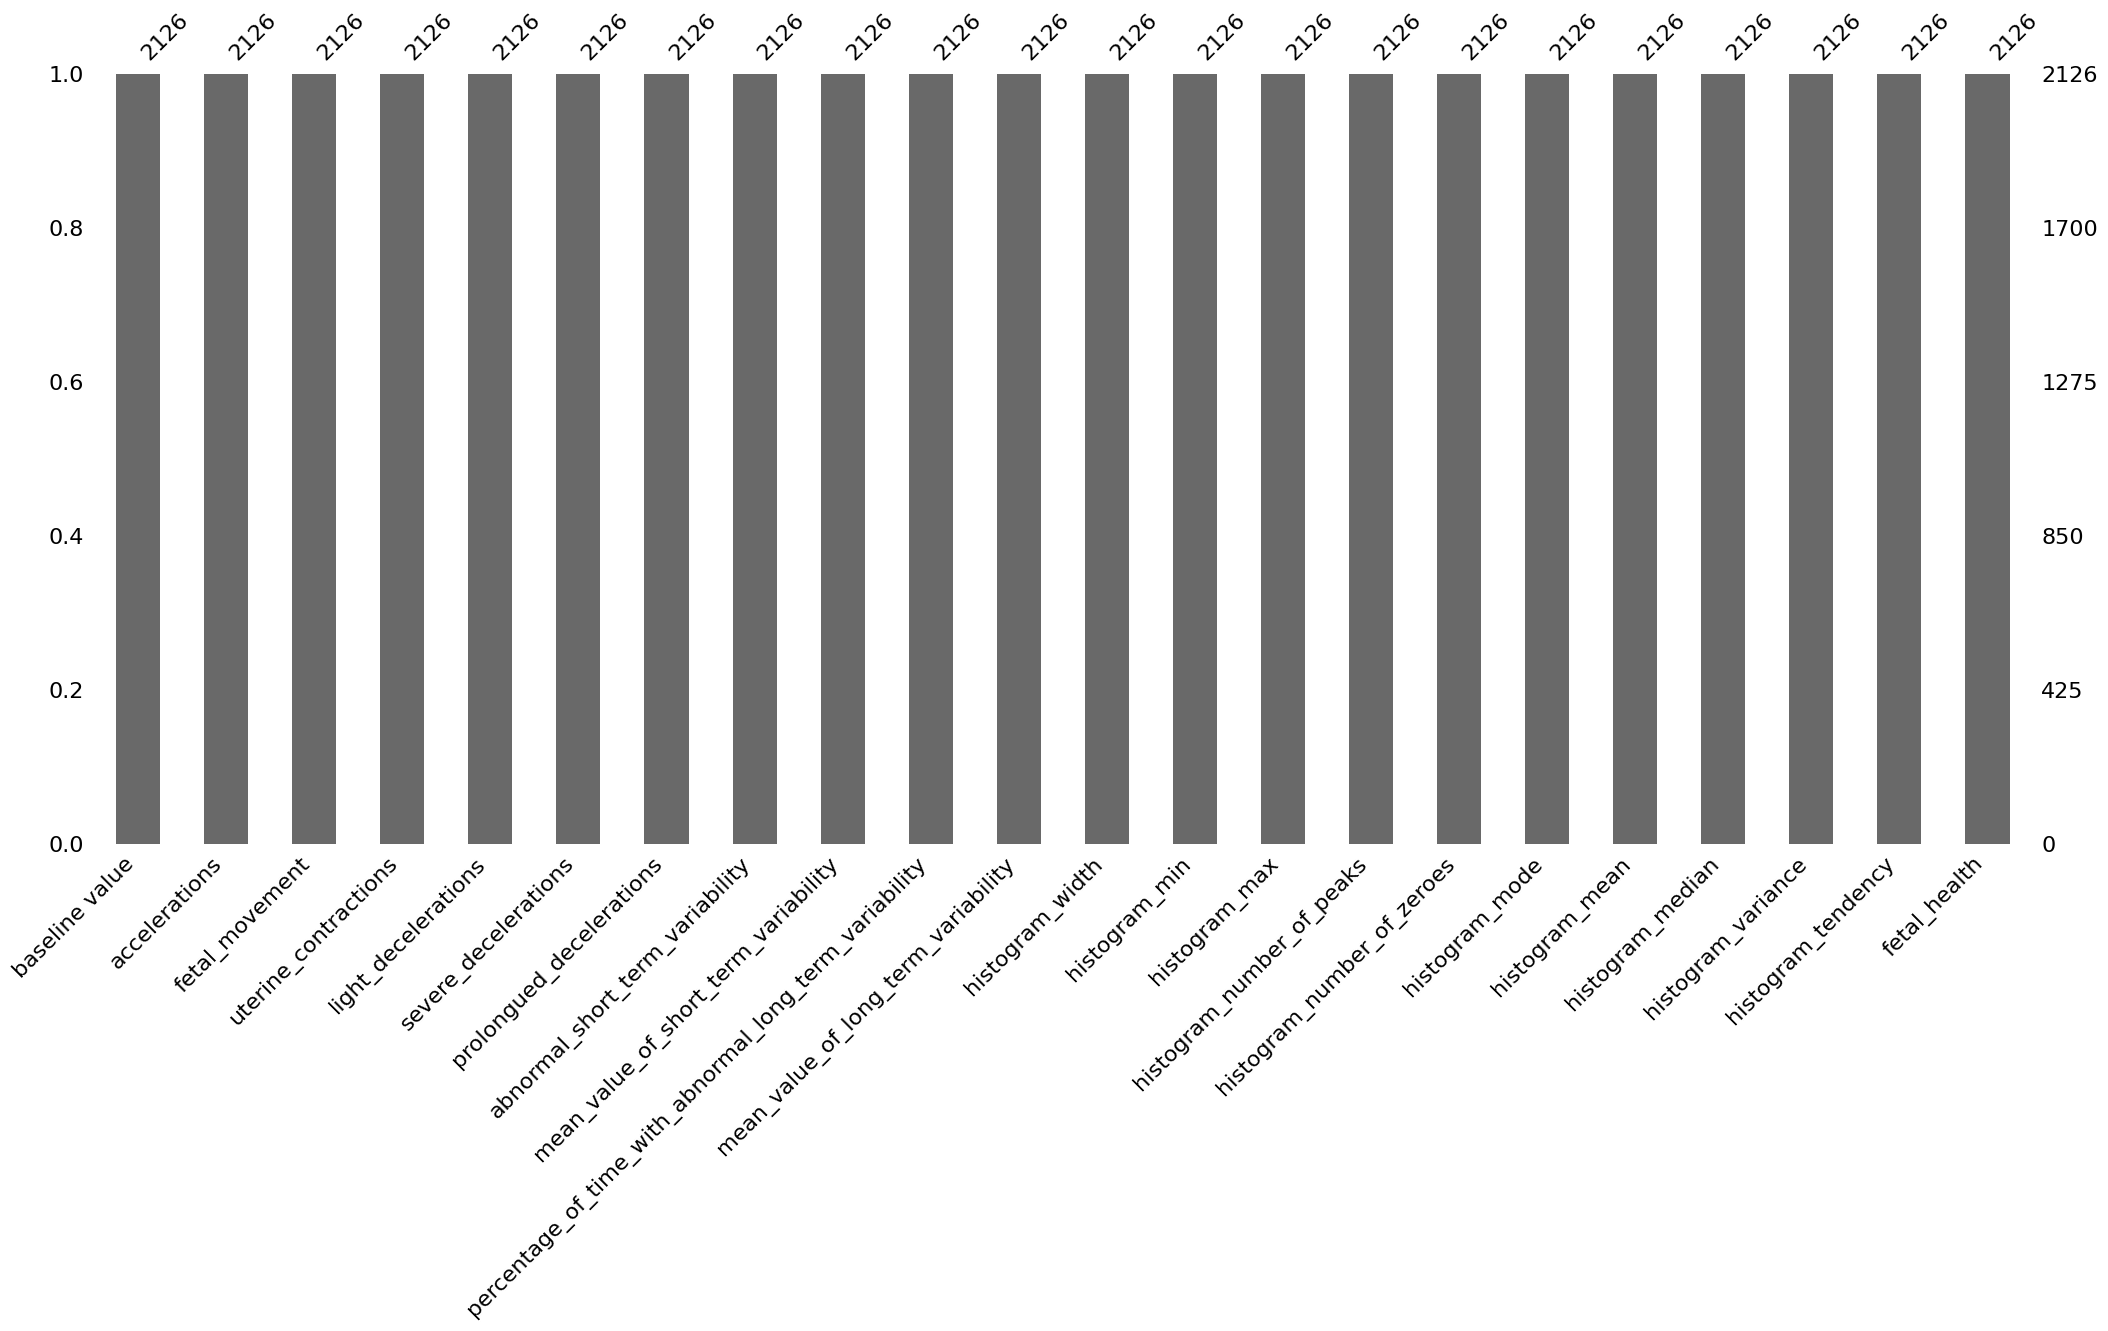

In [41]:
msno.bar(dataset)  # barplot

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

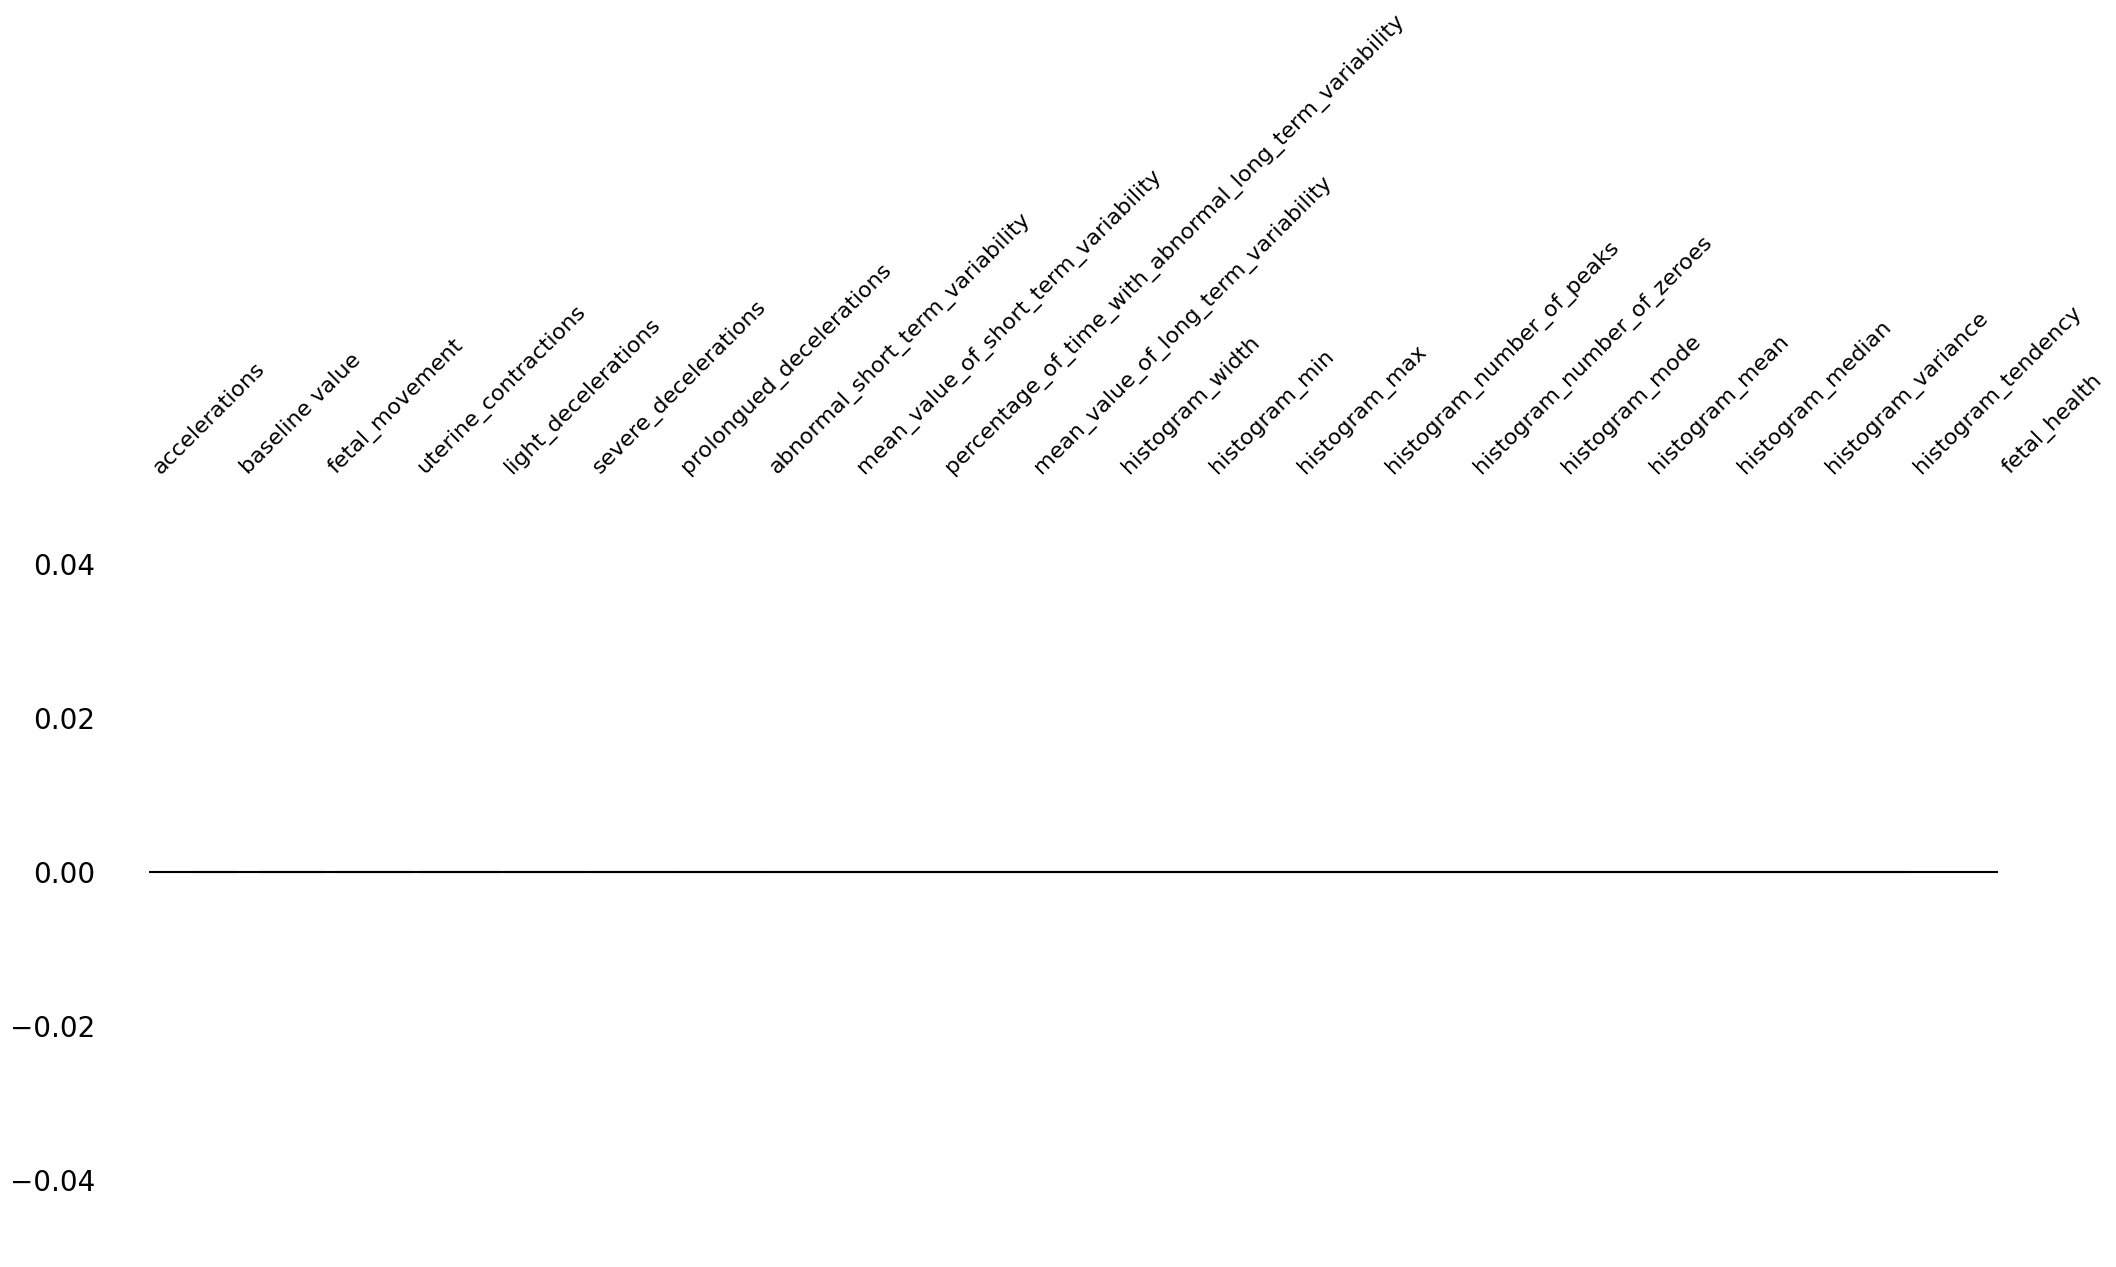

In [42]:
msno.dendrogram(dataset)    # dendrogram

The above dataset **doesn't contain any missing values**, which is obvious if we check the result of the function **isnull( )** that returns false for every feature/everywhere (false means that the values of a feature are not null). Also, we notice that all bars in the barchart of the missingno library reach 1.0 which indicates 100% data completeness. The logic is similar in the dendogram graph where a horizontal line is plotted at 0, which means that all these features are complete. Any deviation from zero value would indicate missing values ​​in the respective feature of the dataset (the farther from 0 the greater the number of missing values).

### **2. Creation of the training and test sets**

Next step is to split the dataset into training set and test set, so that we can train our model and then check its accuracy. For this purpose, we will use the **train_test_split( )** function. Since we want the training set to contain 70% of the original dataset, we set the value 0.7 to the *train_size* parameter. The remaining 30% will be used for testing.

In [43]:
# create the two necessary sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, y, train_size=0.7, random_state=42)
y_train = y_train - 1   # due to "to_categorical"
y_test = y_test - 1
print(X_train.shape)
print(X_test.shape)

(1488, 21)
(638, 21)


### **3. Data Standardization**

Another step we need to perform in terms of data preparation and before we start training the model is standardization. Standardization is a process where the data get mean value equal to 0 and standard deviation equal to 1. The corresponding formula is X'(i) = [ X(i) - μ(i) ] / σ(i).

In [44]:
stdSc = StandardScaler()                         # Create a StandardScaler object

X_train_std = stdSc.fit_transform(X_train)       # Standardization using the fit_transform method
X_test_std = stdSc.fit_transform(X_test)

print('X_train after standardization:\n')        # Print results
print(X_train_std)
print('\n')
print('X_test after standardization:\n')
print(X_test_std)

X_train after standardization:

[[-0.20647709  1.2119168  -0.20748241 ...  0.6212933   0.09685987
   1.12223563]
 [ 0.89941853 -0.83325722 -0.20748241 ...  0.6212933  -0.58074936
  -0.51973745]
 [ 0.3967387  -0.32196372 -0.20748241 ...  0.2131324   0.13074033
   1.12223563]
 ...
 [-1.11130078  0.44497654 -0.20748241 ... -0.80726984  0.40178402
  -0.51973745]
 [-1.81505254 -0.06631697 -0.20748241 ... -0.60318939  0.87611048
  -0.51973745]
 [ 0.89941853 -0.57761047 -0.20748241 ...  0.75734693 -0.51298844
   1.12223563]]


X_test after standardization:

[[-0.09283545 -0.26401986  0.07199948 ... -0.04403748 -0.32671208
  -0.5356864 ]
 [-0.92999474 -0.79791738 -0.17019209 ... -0.98056799  0.39679471
   1.0917799 ]
 [-0.30212528  0.26987767 -0.11637174 ... -0.47628233  0.107392
  -0.5356864 ]
 ...
 [ 1.47683821 -0.79791738 -0.19710226 ...  1.6129011  -0.65229014
  -0.5356864 ]
 [-1.13928456 -0.26401986 -0.19710226 ... -0.83648637 -0.50758878
   1.0917799 ]
 [ 1.26754839  2.13851899 -0.170192

Alternatively, instead of the **StandardScaler( )** function, we can use the above formula.

In [45]:
X_train_std = (X_train - np.mean(X_train, axis=0))/ (np.std(X_train, axis=0) + 1e-10)           # X'(i) = [ X(i) - μ(i) ] / σ(i)
X_test_std = (X_test - np.mean(X_test, axis=0))/ (np.std(X_test, axis=0) + 1e-10)

print('X_train after standardization:\n')                 # Print results
print(X_train_std)
print('\n')
print('X_test after standardization:\n')
print(X_test_std)

X_train after standardization:

[[-0.20647709  1.21191677 -0.20748241 ...  0.6212933   0.09685987
   1.12223563]
 [ 0.89941853 -0.8332572  -0.20748241 ...  0.6212933  -0.58074936
  -0.51973745]
 [ 0.3967387  -0.32196371 -0.20748241 ...  0.2131324   0.13074033
   1.12223563]
 ...
 [-1.11130078  0.44497653 -0.20748241 ... -0.80726984  0.40178402
  -0.51973745]
 [-1.81505254 -0.06631697 -0.20748241 ... -0.60318939  0.87611048
  -0.51973745]
 [ 0.89941853 -0.57761046 -0.20748241 ...  0.75734693 -0.51298844
   1.12223563]]


X_test after standardization:

[[-0.09283545 -0.26401985  0.07199948 ... -0.04403748 -0.32671208
  -0.5356864 ]
 [-0.92999474 -0.79791736 -0.17019209 ... -0.98056799  0.39679471
   1.0917799 ]
 [-0.30212528  0.26987766 -0.11637174 ... -0.47628233  0.107392
  -0.5356864 ]
 ...
 [ 1.47683821 -0.79791736 -0.19710226 ...  1.6129011  -0.65229014
  -0.5356864 ]
 [-1.13928456 -0.26401985 -0.19710226 ... -0.83648637 -0.50758878
   1.0917799 ]
 [ 1.26754839  2.13851894 -0.170192

### **4. Development Of The Linear Model**

Now, it's finally time to develop a linear model that models this process.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy = 0.8824451410658307


Confusion matrix:

[[469  21   6]
 [ 31  58  12]
 [  1   4  36]]




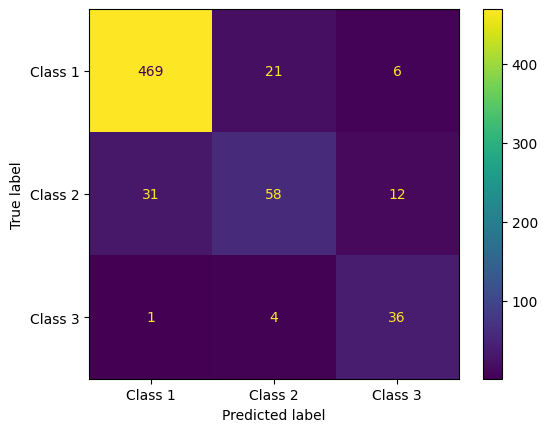

In [46]:
# Using scikit-learn

def run_linear_sklearn(X_train, X_test, y_train, y_test):
  lr = linear_model.LogisticRegression(penalty='none', solver='lbfgs', max_iter=10000)         # Building a logistic regression linear model
  lr.fit(X_train, y_train)                                                                     # Model training on the training data
  y_hat_test = lr.predict(X_test)                                                              # Model evaluation (prediction - y^)

  accuracy = metrics.accuracy_score(y_test, y_hat_test)                    # Calculate accuracy
  confusion_matrix = metrics.confusion_matrix(y_test, y_hat_test)          # Create confusion matrix
  return accuracy, confusion_matrix                                        # Return results


acc = run_linear_sklearn(X_train, X_test, y_train, y_test)                 # Accuracy & Confusion Matrix
# acc = run_linear_sklearn(X_train_std, X_test_std, y_train, y_test)       # Accuracy & Confusion Matrix (For standardized data)

print('Accuracy = {}'.format(acc[0]))      # Print accuracy
print('\n')

print('Confusion matrix:\n')               # Print confusion matrix
print(acc[1])
print('\n')

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = acc[1], display_labels = ["Class 1", "Class 2", "Class 3"])     # Display the confusion matrix
cm_display.plot()
plt.show()

First, we start by developing a linear model using scikit - learn. Inside the above function run_linear_sklearn( ) we create the model by calling **LogisticRegression( )**, we train it on the training data with **fit( )** and we test it on the test data with **predict( )**. Then, we calculate the accuracy as well as the confusion matrix based on y_test and it's estimate y_hat_test and we return the results. Lastly, we print the results and we use the function **ConfusionMatrixDisplay( )** to display the confusion matrix.

In [47]:
# Using tensorflow

def run_linear_tf(X_train, X_test, y_train, y_test):
  model = keras.Sequential()                                                                       # Create logistic regression model
  model.add(layers.Dense(3, activation='softmax', input_shape=(X_train.shape[1],)))

  y_train_c = keras.utils.to_categorical(y_train)       # Transform output into a one-hot vector
  y_test_c = keras.utils.to_categorical(y_test)

  model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(), metrics=["accuracy"])          # Model preparation & parameterization
  model.fit(X_train, y_train_c, epochs=50)                                                                   # Training model for 50 epochs
  y_hat_test = model.predict(X_test)
  score = model.evaluate(X_test, y_test_c)                                                         # Evaluation on test data

  pred_idx = np.argmax(y_hat_test, axis=1)
  true_idx = np.argmax(y_test_c, axis=1)
  confusion_matrix = tf.math.confusion_matrix(true_idx, pred_idx)        # Create confusion matrix

  return score, confusion_matrix                                     # Return results


res, con_mat = run_linear_tf(X_train, X_test, y_train, y_test)                # Accuracy & Confusion Matrix
# res, con_mat = run_linear_tf(X_train_std, X_test_std, y_train, y_test)      # Accuracy & Confusion Matrix (For standardized data)

print("Test loss:", res[0])        # Print loss as well as accuracy
print("Test accuracy:", res[1])
print('\n')

print('Confusion matrix:\n')       # Print confusion matrix
print(con_mat)

Epoch 1/50
47/47 [==============================] - 0s 2ms/step - loss: 16.0077 - accuracy: 0.6935
Epoch 2/50
47/47 [==============================] - 0s 2ms/step - loss: 13.6534 - accuracy: 0.7211
Epoch 3/50
47/47 [==============================] - 0s 2ms/step - loss: 7.3811 - accuracy: 0.7513
Epoch 4/50
47/47 [==============================] - 0s 2ms/step - loss: 8.6478 - accuracy: 0.7614
Epoch 5/50
47/47 [==============================] - 0s 2ms/step - loss: 6.6729 - accuracy: 0.7883
Epoch 6/50
47/47 [==============================] - 0s 2ms/step - loss: 6.6504 - accuracy: 0.7769
Epoch 7/50
47/47 [==============================] - 0s 2ms/step - loss: 8.2920 - accuracy: 0.7843
Epoch 8/50
47/47 [==============================] - 0s 3ms/step - loss: 7.0064 - accuracy: 0.7715
Epoch 9/50
47/47 [==============================] - 0s 2ms/step - loss: 6.4144 - accuracy: 0.7883
Epoch 10/50
47/47 [==============================] - 0s 2ms/step - loss: 6.7655 - accuracy: 0.7883
Epoch 11/50
47/47

Next, we perform the same process this time using tensorflow. Since we are talking about a multiple classification problem, we must choose softmax as the activation function. Loss function is cross entropy, optimizer is SGD (we don't define batch size since we want to use the default - the same goes for learning rate) and the corresponding metric is accuracy. The training will take place for 50 epochs and we make sure that the necessary transformations to one-hot vectors are done.

**Observations:**


*   If we try the first method (using **scikit - learn**), we achieve an accuracy close to 0.885 with the initial data, while with the standardized data the accuracy shows a small decrease and it gets close to 0.882. So we notice that there is a difference between the experiments with the initial data and the experiments with the standardized data, but as we can see it isn't very big. As for the second case (using **tensorflow**), when it comes to the original data the accuracy is close to 0.70 and the loss is in the range {1 - 10}, while if we use the standardized data the accuracy rises to 0.86 and the loss decreases considerably and falls close to 0.20. The changes in accuracy are significant whether we are talking about scikit-learn or tensorflow, as well as the difference we observe in the loss in the case of tensorflow which is particularly large. If we run the same model several times we notice that the output values ​​(accuracy - loss) are not the same every time, but they do change from a little to a lot. So, data standardization yields better results especially in the case of tensorflow.



### **5. Experiments to develop a neural network model**

Then, we experiment with different neural network architectures in order to improve the performance of our model.

In [48]:
# Define the model
model = keras.Sequential()
model.add(layers.Dense(1000, activation='relu'))     # 5 hidden layers with 1000 neurons each
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))     # output layer

# model.summary()

y_train_c = keras.utils.to_categorical(y_train)       # Transformation of the output (prediction) into an one-hot vector
y_test_c = keras.utils.to_categorical(y_test)         # Transformation of the output (prediction) into an one-hot vector

# Compile model
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Train model on the training set
model.fit(X_train_std, y_train_c, epochs=50, batch_size=32)

# Evaluate model on the test set
score = model.evaluate(X_test_std, y_test_c)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/50
47/47 [==============================] - 6s 95ms/step - loss: 0.2567 - accuracy: 0.8313
Epoch 2/50
47/47 [==============================] - 3s 70ms/step - loss: 0.1675 - accuracy: 0.8884
Epoch 3/50
47/47 [==============================] - 3s 66ms/step - loss: 0.1425 - accuracy: 0.9046
Epoch 4/50
47/47 [==============================] - 3s 68ms/step - loss: 0.1466 - accuracy: 0.8958
Epoch 5/50
47/47 [==============================] - 3s 69ms/step - loss: 0.1394 - accuracy: 0.9133
Epoch 6/50
47/47 [==============================] - 4s 87ms/step - loss: 0.1263 - accuracy: 0.9200
Epoch 7/50
47/47 [==============================] - 3s 70ms/step - loss: 0.1072 - accuracy: 0.9308
Epoch 8/50
47/47 [==============================] - 3s 66ms/step - loss: 0.1143 - accuracy: 0.9308
Epoch 9/50
47/47 [==============================] - 3s 71ms/step - loss: 0.0948 - accuracy: 0.9496
Epoch 10/50
47/47 [==============================] - 4s 87ms/step - loss: 0.1068 - accuracy: 0.9382
Epoch 11/

Alternatively:

In [49]:
# Define the model
model = keras.Sequential()
model.add(layers.Dense(100, activation='relu'))     # 10 hidden layers with 100 neurons each
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))    # output layer

# model.summary()

y_train_c = keras.utils.to_categorical(y_train)       # Transformation of the output (prediction) into an one-hot vector
y_test_c = keras.utils.to_categorical(y_test)         # Transformation of the output (prediction) into an one-hot vector

# Compile model
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Train model on training set
model.fit(X_train_std, y_train_c, epochs=50, batch_size=32)

# Evaluate model on test set
score = model.evaluate(X_test_std, y_test_c)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/50
47/47 [==============================] - 4s 9ms/step - loss: 0.4142 - accuracy: 0.7695
Epoch 2/50
47/47 [==============================] - 0s 8ms/step - loss: 0.2118 - accuracy: 0.8448
Epoch 3/50
47/47 [==============================] - 0s 7ms/step - loss: 0.1654 - accuracy: 0.8871
Epoch 4/50
47/47 [==============================] - 0s 8ms/step - loss: 0.1478 - accuracy: 0.9032
Epoch 5/50
47/47 [==============================] - 0s 7ms/step - loss: 0.1339 - accuracy: 0.9187
Epoch 6/50
47/47 [==============================] - 0s 8ms/step - loss: 0.1210 - accuracy: 0.9207
Epoch 7/50
47/47 [==============================] - 0s 7ms/step - loss: 0.1030 - accuracy: 0.9382
Epoch 8/50
47/47 [==============================] - 0s 9ms/step - loss: 0.1117 - accuracy: 0.9173
Epoch 9/50
47/47 [==============================] - 1s 11ms/step - loss: 0.1035 - accuracy: 0.9355
Epoch 10/50
47/47 [==============================] - 0s 9ms/step - loss: 0.0877 - accuracy: 0.9415
Epoch 11/50
47/47 

Or else:

In [50]:
# Define the model
model = keras.Sequential()
model.add(layers.Dense(100, activation='relu'))        # 5 hidden layers with 100 neurons each
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))       # ouput layer

# model.summary()

y_train_c = keras.utils.to_categorical(y_train)       # Transformation of the output (prediction) into an one-hot vector
y_test_c = keras.utils.to_categorical(y_test)         # Transformation of the output (prediction) into an one-hot vector

# Compile model
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])

# Train model on training set
model.fit(X_train_std, y_train_c, epochs=50, batch_size=32)

# Evaluate model on test set
score = model.evaluate(X_test_std, y_test_c)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/50
47/47 [==============================] - 1s 4ms/step - loss: 0.6722 - accuracy: 0.5887
Epoch 2/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6127 - accuracy: 0.7796
Epoch 3/50
47/47 [==============================] - 0s 4ms/step - loss: 0.5595 - accuracy: 0.7789
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 0.5104 - accuracy: 0.7789
Epoch 5/50
47/47 [==============================] - 0s 4ms/step - loss: 0.4688 - accuracy: 0.7789
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 0.4366 - accuracy: 0.7789
Epoch 7/50
47/47 [==============================] - 0s 4ms/step - loss: 0.4127 - accuracy: 0.7789
Epoch 8/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3935 - accuracy: 0.7789
Epoch 9/50
47/47 [==============================] - 0s 4ms/step - loss: 0.3763 - accuracy: 0.7789
Epoch 10/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3596 - accuracy: 0.7789
Epoch 11/50
47/47 [

After several experiments, we come to the following conclusions:


*   Using the "Adam" optimizer in several cases leads to relatively better results than the "SGD" optimizer in this particular problem. However, both optimizers seem to significantly affect the result.

*   Adding many neurons to each layer combined with the number of hidden layers significantly affects the performance of the model. E.g. 1000 neurons in 2 hidden layers give an accuracy close to 0.90, but if we increase the number of layers a bit, the accuracy seems to decrease quite a bit.

*   We observe that some models that have more hidden layers or more neurons than the model of the example 4 have worse performance than this one.

*   If we create a complex neural network with a large number of hidden layers and neurons, we notice that the model no longer performs well and this is due to overtraining.


---

Below there is a table with some indicative results obtained through the experimentation:


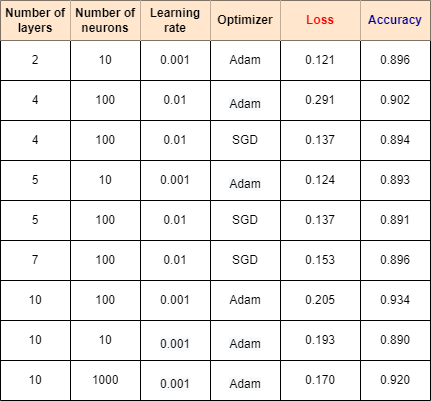

### **6. Neural network architecture evaluation**

Now, we develop a neural network with four hidden layers of 100 neurons each, ReLU activation function, Adam optimizer with a learning rate of 0.001 and 100 training epochs with a batch size of 128. Then we evaluate this network on the standardized data.

In [51]:
# Define the model
model = keras.Sequential()
model.add(layers.Dense(100, activation='relu'))       # 4 hidden layers
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))      # output layer

# model.summary()

y_train_c = keras.utils.to_categorical(y_train)      # Conversion of the output (prediction) into an one-hot vector
y_test_c = keras.utils.to_categorical(y_test)        # Conversion of the output (prediction) into an one-hot vector

# Compile model
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Train model on training set
model.fit(X_train_std, y_train_c, epochs=100, batch_size=128)

# Evaluate model on test set
score = model.evaluate(X_test_std, y_test_c)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 0.5648 - accuracy: 0.6868
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3706 - accuracy: 0.7802
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2433 - accuracy: 0.8461
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1849 - accuracy: 0.8858
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1641 - accuracy: 0.8905
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1476 - accuracy: 0.9026
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1365 - accuracy: 0.9073
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1279 - accuracy: 0.9133
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1217 - accuracy: 0.9167
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1151 - accuracy: 0.9227
Epoch 11/

We add 4 hidden layers with 100 neurons each and a ReLU activation function, as well as an additional layer after them which is the output layer with 3 neurons (as many as the labels) and a softmax activation function due to multiple categorization. We convert the outputs into one-hot vectors, which we use to train and test our model. After we have built, parameterized and trained the model, we can evaluate it on the test data. The evaluation gives the following results:  the loss is close to 0.3 and the accuracy is quite high and reaches 0.9. The accuracy we achieved with this particular neural network is pretty satisfying.

### **7. Classification using Random Forest**

In the end, we are using the Random Forest algorithm to classify the dataset and check if this method actually performs better than the models we developed previously. The steps we are following in this case are the same as before.

Accuracy = 0.945141065830721


Confusion matrix:

[[487   7   2]
 [ 19  79   3]
 [  2   2  37]]




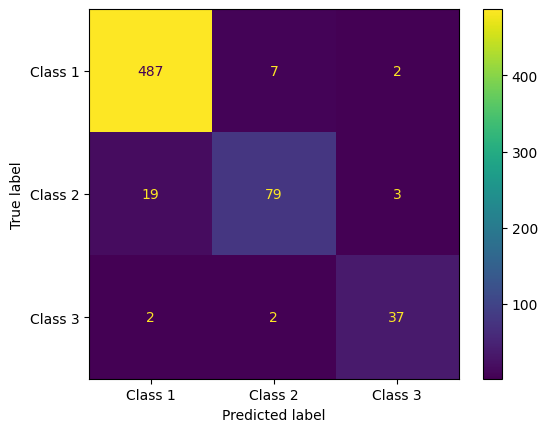

In [52]:
# Create a RF classifier model
clf = RandomForestClassifier(n_estimators = 100)

# Train the model on the training set
clf.fit(X_train, y_train)

# Perform predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy and confusion matrix
rf_accuracy = metrics.accuracy_score(y_test, y_pred)
rf_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Print results
print('Accuracy = {}'.format(rf_accuracy))
print('\n')
print('Confusion matrix:\n')
print(rf_confusion_matrix)
print('\n')

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_confusion_matrix, display_labels = ["Class 1", "Class 2", "Class 3"])
cm_display.plot()
plt.show()

What we notice is that the accuracy has increased quite a bit and it has reached a level where we can say that it is very satisfying, especially compared to the accuracy we encountered in the previous examples. Examining the confusion matrix, we see that most of the samples are on the main diagonal of the figure, which means that the predictions made in these cases are correct, and there are only few samples for which the prediction differs from the actual label.